# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Tasya Nur'aini
- **Email:** m284b4kx4293@bangkit.academy
- **ID Dicoding:** tassyaini

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap jumlah penyewa yang terdaftar?
- Bagaimana perbandingan pengguna terdaftar (registered) dan tidak terdaftar (casual) untuk setiap hari?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [10]:
url = 'https://raw.githubusercontent.com/tassyaini/Submission1/refs/heads/main/Data/day.csv'
data = pd.read_csv(url)

print(data.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [11]:
day_csv = pd.read_csv("day.csv", delimiter=",")

**Insight:**
- Memanggil file day.csv pada dataset bike sharing
- memanggil file day.csv ke google colab setelah di extract

### Assessing Data

In [15]:
day_csv = pd.read_csv("day.csv")

day_csv.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
- Mengidentifikasi masalah yang ada pada data
- Mendapatkan hasil bahwa data tidak terdapat missing value

### Cleaning Data

In [16]:
day_csv = pd.read_csv("day.csv")
day_csv.dropna(axis=0, inplace=True)

**Insight:**
- Menggunakan teknik dropping
- Data tidak ada missing value jadi data sudah tidak ada masalah

## Exploratory Data Analysis (EDA)

### Explore...

In [17]:
day_csv.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [18]:
day_csv.groupby(by="season").agg({
    "registered": "nunique",
    "windspeed": ["max", "min", "mean", "std"]
})

registered windspeed                              
          nunique       max       min      mean       std
season                                                   
1             177  0.507463  0.045408  0.214537  0.086439
2             180  0.388067  0.065929  0.203507  0.071629
3             181  0.375617  0.064071  0.172095  0.059526
4             177  0.422275  0.022392  0.171995  0.081565

**Insight:**
- Pivot table berisi informasi jumlah pengguna yang registered
- Berisi parameter windspeed yang dikelompokkan berdasarkan season

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-19-d60c1ec0ba81>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='registered', data=day_csv,
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-li

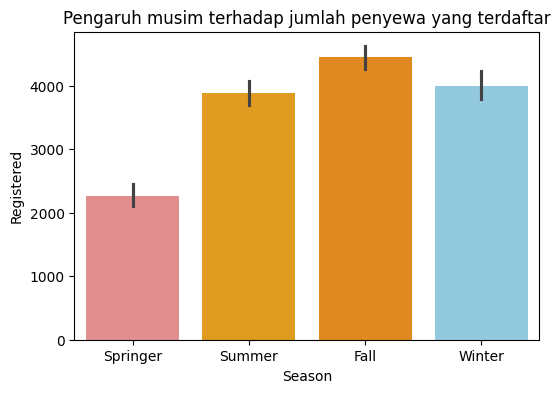

In [19]:
# Membuat visualisasi
plt.figure(figsize=(6, 4))
sns.barplot(x='season', y='registered', data=day_csv,
            palette={'1': 'lightcoral', '2': 'orange',
                     '3': 'darkorange', '4': 'skyblue'})

# Menambahkan label dan judul
plt.xlabel('Season')
plt.ylabel('Registered')
plt.title('Pengaruh musim terhadap jumlah penyewa yang terdaftar')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Springer', 'Summer', 'Fall', 'Winter'])
plt.show()

### Pertanyaan 2:

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


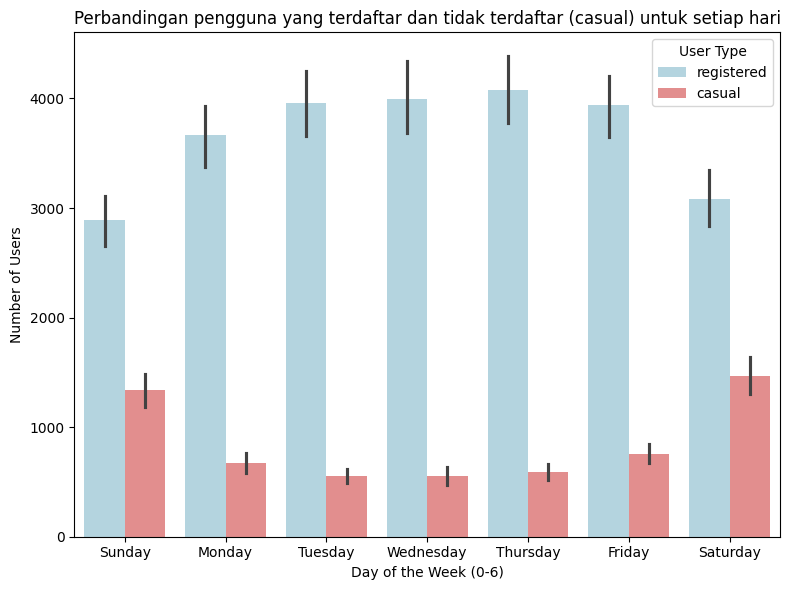

In [20]:
# Mengambil data yang diperlukan
days = day_csv['weekday'].tolist()  # Kolom weekday
registered_counts = day_csv['registered'].tolist()  # Kolom registered
casual_counts = day_csv['casual'].tolist()  # Kolom casual

# Membuat DataFrame baru untuk visualisasi
data = {
    'weekday': days,
    'registered': registered_counts,
    'casual': casual_counts
}
df = pd.DataFrame(data)

# Mengubah DataFrame ke format yang panjang (melt)
df_melted = df.melt(id_vars='weekday', value_vars=['registered', 'casual'],
                     var_name='user_type', value_name='count')

# Membuat visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x='weekday', y='count', hue='user_type', data=df_melted,
            hue_order=['registered', 'casual'],  # Mengatur urutan hue
            palette={'registered': 'lightblue', 'casual': 'lightcoral'})  # Menentukan warna

# Menambahkan label dan judul
plt.xlabel('Day of the Week (0-6)')
plt.ylabel('Number of Users')
plt.title('Perbandingan pengguna yang terdaftar dan tidak terdaftar (casual) untuk setiap hari')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])  # Menggunakan angka 0-6
plt.legend(title='User Type')
plt.tight_layout()
plt.show()

**Insight:**
- Mendapat hasil visualisasi data sesuai dengan pertanyaan 1 dengan bentuk bar chart
- Mendapat hasil visualisasi data sesuai dengan pertanyaan 2 dengan bentuk bar chart

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 :
Setelah dilakukan analisis data dan visualisasi data diperoleh jawaban dari pertanyaan 1. Pada Bar chart terlihat jelas bahwa musim mempengaruhi banyaknya pengguna yang registered. Penyewa registered paling banyak menyewa ketika musim gugur (fall) dan sangat sedikit yang menyewa pada musim springer (semi).
- Conclution pertanyaan 2 :
Setelah dilakukan analisis data dan visualisasi data diperoleh jawaban dari pertanyaan 1. Pada Bar chart terlihat jelas bahwa penyewa yang registered lebih banyak daripada penyewa yang casual untuk setiap harinya, bahkan perbedaannya sangat terlihat jauh.